In [1]:
import warnings
warnings.filterwarnings('ignore')

# Question 1

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def getCommunities(G_orig, k):
    """
    Newman-Girvan algorithm implementation for non-overlapping communities. 
    The algorithm receive a network and parameter k (number of communities).
    Return: the communities in G_orig.
    """
    G = G_orig.copy()
    
    numOfCommunities = nx.number_connected_components(G)
    
    while (len(G.edges()) > 0) and (k > numOfCommunities):
#        print("numOfCommunities: {}".format(numOfCommunities))
        edge_centrality = nx.edge_betweenness_centrality(G)
        max_centrality = 0
        to_remove = []
        for edge in edge_centrality:
            if edge_centrality[edge] > max_centrality:
                to_remove = [edge]
                max_centrality = edge_centrality[edge]

            elif edge_centrality[edge] == max_centrality:
                to_remove.append(edge)

#            print(edge, edge_centrality[edge])
#        print(to_remove)

        for tr in to_remove:
            G.remove_edge(*tr)

        numOfCommunities = nx.number_connected_components(G)

    communities = []
    for com in nx.connected_components(G):
        communities.append(list(com))

    return communities
       

# testing    
# print("############### testing ###############")
# G=nx.Graph()

# G.add_edge(0, 1)
# G.add_edge(1, 2)
# G.add_edge(2, 0)

# G.add_edge(3, 4)
# G.add_edge(4, 5)
# G.add_edge(5, 3)

# G.add_edge(6, 7)
# G.add_edge(7, 8)
# G.add_edge(8, 6)

# G.add_edge(9, 10)
# G.add_edge(10, 11)
# G.add_edge(11, 9)

# G.add_edge(0, 12)
# G.add_edge(3, 12)

# G.add_edge(6, 13)
# G.add_edge(9, 13)

# G.add_edge(12, 13)

                    
# nx.draw(G, with_labels=True, node_size=1000)
# plt.show()

# print("-------------")

# com = getCommunities(G, 4)
# print(com) 


[[1, 3, 5, 7, 9, 10, 13, 16, 21, 22, 24, 25, 26, 27, 29, 30, 31, 34, 36, 38, 39, 40, 45, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 69, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 87, 88, 92, 94, 96, 98, 100, 101, 103, 104, 105, 106, 107, 108, 109, 113, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 139, 141, 142, 146, 148, 150, 153, 156, 158, 159, 160, 161, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 176, 178, 180, 183, 184, 185, 186, 187, 188, 189, 190, 191, 194, 196, 197, 198, 199, 200, 202, 203, 204, 206, 207, 208, 211, 212, 213, 217, 221, 222, 223, 224, 228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 242, 246, 247, 248, 249, 250, 251, 252, 254, 257, 258, 260, 261, 265, 266, 268, 269, 270, 271, 272, 274, 276, 277, 280, 281, 283, 284, 285, 286, 288, 290, 291, 294, 295, 297, 298, 299, 300, 301, 302, 303, 304, 308, 309, 311, 313, 314, 315, 316, 317, 318, 320, 322, 323, 324, 325, 329, 330, 331, 332, 334

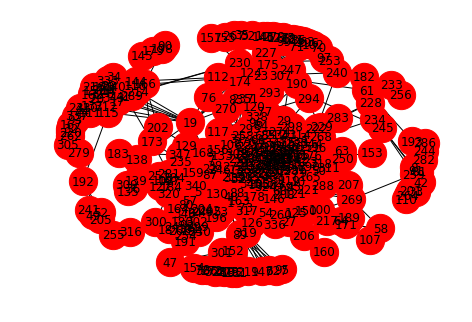

In [3]:
%matplotlib inline

# load edges list
edgesList = []
with open("communities.txt", "r") as inp:
    for line in inp:
        lineSplit = line.split()
        edgesList.append((int(lineSplit[0]), int(lineSplit[1])))
        
#print(edgesList)

# create graph
G = nx.Graph()
G.add_edges_from(edgesList)

#print("G connected components: {}".format([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]))

# find the largest connected component
largestConnComp = max(nx.connected_components(G), key=len)
#print("largestConnComp size: {}".format(len(largestConnComp)))

H = G.subgraph(largestConnComp)

#nx.draw(H, with_labels=True, node_size=800)
#plt.show()

#print("H size: {}".format(len(H.nodes())))

# run community detection
com = getCommunities(H, 3)
print(com) 

#print("G size: {}".format(len(G.nodes())))

nx.draw(G, with_labels=True, node_size=800)
plt.show()

# Question 2

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

def getCommunities(G, k):
    """
    K-clique communities detection algorithm implementation. 
    The algorithm should receive a network and parameter k (size of clique).
    Return: the communities in G_orig.
    """
    clique_list= list(nx.find_cliques(G)) #creating a list of all of the maximal qliues in G
    clique_num=len(clique_list)
    if clique_num==0: #well shit there are no maximal cliques
        return []
    overlap_matrix=[ [ 0 for i in range(clique_num) ] for j in range(clique_num) ] #initalizing the overlapping matrix
    threshold_matrix=[ [ 0 for i in range(clique_num) ] for j in range(clique_num) ] #initalizing the threshold matrix
    for i in range(clique_num):
        for j in range(i,clique_num): #The matrix is symetric. We want to save time.
            temp_list= [x for x in clique_list[i] if x in clique_list[j]]  #intersection of two of two of the cliques
            overlap_matrix[i][j]=len(temp_list)
            overlap_matrix[j][i]=len(temp_list)
    for i in range(clique_num):
        for j in range(i,clique_num): #The matrix is symetric. We want to save time.
            if i==j:
                if overlap_matrix[i][i]>=k:
                    threshold_matrix[i][i]=1
            if i!=j:
                if overlap_matrix[i][j]>=k-1:
                    threshold_matrix[i][j]=1
                    threshold_matrix[j][i]=1
    #now that we have the adjacent matrix let's turn it into a graph and use BFS as a way to find the components
    connected_components=[]
    T=nx.Graph()
    
    
    for i in range(clique_num):
        for j in range (i,clique_num):
            if threshold_matrix[i][j]==1:
                #print("There's a match!")
                T.add_edge(i,j)
    #nx.draw(T, with_labels=True, node_color = "blue", node_size=2000)
    #plt.show()
    for i in range(clique_num):
        if i in T.nodes():
            edges = nx.bfs_edges(T, i)
            nodes = [i] + [v for u, v in edges]
            connected_components.append(nodes)  #We're using BFS and finding the components
    #print ("the connected components are:",connected_components)
    #now we're getting rid of the duplicates
    components_indexes=[]
    for component in connected_components:
        if component not in components_indexes:
            components_indexes.append(component)
      
    
    #now it's time to turn it into a list of lists of nodes while keeping the duplicates away.
    output = []
    for i in range(len(components_indexes)):
        temp= set()
        for item in components_indexes[i]:
            temp.update(clique_list[item]) 
        output.append(temp)
    final_output=[]
    for item in output:
        if item not in final_output:
            final_output.append(item)
        
    return final_output


In [5]:
# load edges list
edgesList = []
with open("communities.txt", "r") as inp:
    for line in inp:
        lineSplit = line.split()
        edgesList.append((int(lineSplit[0]), int(lineSplit[1])))
        
#print(edgesList)

G = nx.Graph()
G.add_edges_from(edgesList)    

# find the largest connected component
largestConnComp = max(nx.connected_components(G), key=len)
#print("largestConnComp size: {}".format(len(largestConnComp)))

H = G.subgraph(largestConnComp)

print(getCommunities(H,4))

[set([1, 3, 5, 7, 9, 10, 13, 16, 21, 22, 24, 25, 26, 27, 29, 30, 31, 36, 38, 39, 40, 45, 48, 50, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 65, 66, 67, 69, 72, 73, 75, 77, 79, 80, 82, 84, 85, 87, 88, 92, 94, 96, 98, 100, 101, 103, 104, 105, 106, 108, 109, 113, 118, 119, 121, 122, 123, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 139, 141, 142, 146, 148, 150, 156, 158, 159, 161, 163, 165, 168, 169, 170, 171, 172, 176, 178, 180, 184, 185, 186, 187, 188, 189, 194, 196, 197, 199, 200, 203, 204, 208, 211, 212, 213, 217, 221, 222, 223, 224, 229, 231, 232, 236, 238, 239, 242, 246, 248, 249, 250, 251, 252, 254, 257, 258, 261, 265, 266, 268, 271, 272, 274, 276, 277, 280, 281, 284, 285, 290, 291, 295, 297, 298, 299, 300, 302, 303, 304, 308, 309, 313, 314, 315, 317, 318, 320, 322, 323, 324, 325, 329, 330, 331, 332, 334, 338, 339, 340, 341, 342, 344, 345, 346, 347]), set([2, 137, 140, 14, 144, 17, 19, 20, 149, 151, 28, 32, 162, 167, 41, 44, 243, 310, 312, 326, 333, 337, 214, 343, 93, 226, 111, 1